In [1]:
import numpy as np

import matplotlib.pyplot as plt
import pickle
import scipy.stats

%load_ext autoreload
%autoreload 2

## Read Data

In [30]:
subjectNames = ['sam','tabitha','chloe','blanche','b06','b07','b08','b09','b10','b01','b02','b03','b04','b05','WSLS']
numSubjects = len(subjectNames)

speciesList = np.array([0,0,0,0,2,2,2,2,2,1,1,1,1,1,3])

speciesColors = ['#fb8072', '#8dd3c7','#3288bd','#000000']
speciesAlphas = [0.6,0.6,0.9,0.9]
######################################

analysis = []
data = []

for i in range(numSubjects):
    with open('analysis/'+subjectNames[i]+'.pickle', 'rb') as f:
        [A] = pickle.load(f)
    analysis.append(A)

    with open('data/'+subjectNames[i]+'.pickle', 'rb') as f:
        [D] = pickle.load(f)
    data.append(D)


## Collect trials-to-criteria

In [31]:
t2c = []
t2cAlt = []

for i in range(numSubjects):
    t2c.append(data[i]['blocksData']['trialsToCriteria'])
    if isinstance(analysis[i]['categoryAnalysis'], dict):
        t2cAlt.append(analysis[i]['categoryAnalysis']['monByHumCrit'][:,0].tolist())

## Generate Plot

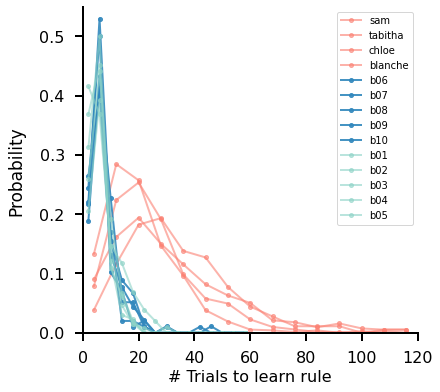

In [38]:
UseAdjCrit = False

fig, ax = plt.subplots(figsize=(6,6),nrows=1,ncols=1)

yticks = np.arange(0,0.6,0.1)

for i in range(numSubjects):

    if speciesList[i] == 0:
        binMin = 0
        binMax = 120
        binWidth = 8
        if UseAdjCrit:
            trialsToCriteria = np.array(t2cAlt[i])
        else:
            trialsToCriteria = np.array(t2c[i])
    elif speciesList[i] > 0 and speciesList[i] < 3:
        binMin = 0
        binMax = 60
        binWidth = 4
        if UseAdjCrit and speciesList[i] == 2:
            trialsToCriteria = np.array(t2cAlt[i])
        else:
            trialsToCriteria = np.array(t2c[i])
    else:
        binMin = 0
        binMax = 80
        binWidth = 6
        if UseAdjCrit:
            trialsToCriteria = np.array(t2c[i])
        else:
            continue

    bins = np.arange(binMin,binMax+binWidth,binWidth)
    N = trialsToCriteria.shape[0]
    H, _ = np.histogram(trialsToCriteria, bins=bins, density=False)
    binCenters = bins[:-1] + binWidth/2


    ax.plot(binCenters,H/N,linewidth=2,label=subjectNames[i],marker='.',markersize=8,color=speciesColors[speciesList[i]],alpha=speciesAlphas[speciesList[i]])

ax.set_xlabel('# Trials to learn rule',fontsize=16)
fig.text(-0.05, 0.5, 'Probability', va='center', rotation='vertical', size=17)

ax.set_yticks(yticks)
ax.tick_params(axis='x',labelsize= 16,direction='in',pad=10)
ax.tick_params(axis='y',labelsize= 16,direction='in',pad=10)
ax.set_xlim([0,120])
ax.set_ylim([yticks[0],0.55])
ax.legend()

# change all spines
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# increase tick width
ax.tick_params(width=2)
ax.tick_params(direction='out',length=8)

# plt.savefig('monkeyHumanT2CAlt0.eps', format='eps')

In [5]:
t2cMeans = [np.mean(t2c[i]) for i in range(len(t2c))]

In [6]:
print([np.mean(t2cMeans[:4]), np.mean(t2cMeans[4:9]), np.mean(t2cMeans[9:13])])

[27.841872943566372, 6.470247095401736, 5.978036511669446]


In [8]:
print([np.std(t2cMeans[:4])/np.sqrt(4), np.std(t2cMeans[4:9])/np.sqrt(5), np.std(t2cMeans[9:13])/np.sqrt(5)])

[2.9205590948354554, 0.19483201716638945, 0.5176777208695811]


In [9]:
t2cAltMeans = [np.mean(t2cAlt[i]) for i in range(len(t2cAlt))]

In [23]:
print([np.mean(t2cAltMeans[:4]), np.mean(t2cAltMeans[4:9])])

[20.6134633007793, 5.494926561901525]


In [24]:
print([np.std(t2cAltMeans[:4])/np.sqrt(4), np.std(t2cAltMeans[4:9])/np.sqrt(5)])

[1.518368747456403, 0.2132266586727406]


In [22]:
scipy.stats.ttest_ind(t2cAltMeans[:4], t2cMeans[9:13], equal_var=False)

Ttest_indResult(statistic=7.926791866983321, pvalue=0.001975665262824211)

In [21]:
scipy.stats.ttest_ind(t2cMeans[:4], t2cMeans[4:9], equal_var=False)

Ttest_indResult(statistic=6.324090987170275, pvalue=0.007796292250088119)